In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
def extract_data(file_name):
    data_text = open(file_name, 'r')
    data_list = []
    event_counter = 0
    for line in data_text:
        line_data = list(map(float, line.split()))
        line_data = line_data[0:2]
        data_list.append(line_data)
        event_counter += 1
    first_event_time = data_list[0][0]
    last_event_time = data_list[-1][0]
    normolized_events = np.linspace(first_event_time,
                                    last_event_time, event_counter)
    for i in range(0, event_counter):
        data_list[i][0] = normolized_events[i]

    return data_list

In [8]:
data = extract_data('wnaap.dat')

In [9]:
#print(data)

[[1900.0, 12.0], [1900.0027379092219, 12.0], [1900.0054758184435, 12.0], [1900.0082137276654, 3.0], [1900.0109516368873, 0.0], [1900.013689546109, 0.0], [1900.0164274553308, 0.0], [1900.0191653645527, 0.0], [1900.0219032737743, 0.0], [1900.0246411829962, 0.0], [1900.027379092218, 0.0], [1900.0301170014397, 0.0], [1900.0328549106616, 22.0], [1900.0355928198835, 52.0], [1900.0383307291052, 45.0], [1900.041068638327, 27.0], [1900.043806547549, 38.0], [1900.0465444567706, 22.0], [1900.0492823659924, 15.0], [1900.052020275214, 12.0], [1900.054758184436, 12.0], [1900.0574960936578, 0.0], [1900.0602340028795, 0.0], [1900.0629719121014, 12.0], [1900.0657098213233, 17.0], [1900.068447730545, 20.0], [1900.0711856397668, 42.0], [1900.0739235489887, 28.0], [1900.0766614582103, 30.0], [1900.0793993674322, 20.0], [1900.082137276654, 27.0], [1900.0848751858757, 18.0], [1900.0876130950976, 18.0], [1900.0903510043195, 13.0], [1900.0930889135411, 12.0], [1900.095826822763, 72.0], [1900.0985647319849, 62

In [12]:
def add_graph_parametrs(fig_size_x = 15, figsize_y = 15, #размеры окна с графиком
                    left_border = 1900, right_border = 2016, #границы, в которых показывается график по оси абсцисс
                    lower_border = -30, upper_border = 30 #границы, в которых показывается график по оси ординат
                   ):
    plt.figure(figsize=(fig_size_x, figsize_y))
    axes = plt.gca()
    axes.set_xlim([left_border, right_border])
    axes.set_ylim([lower_border, upper_border])
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('number')

In [29]:
month = 1 / 12
activity_minimums_list = [1902 + 1 * month,
                          1913 + 7 * month,
                          1923 + 7 * month,
                          1933 + 8 * month,
                          1944 + 1 * month,
                          1954 + 3 * month,
                          1964 + 9 * month,
                          1976 + 5 * month,
                          1986 + 8 * month,
                          1996 + 4 * month,
                          2009 + 0 * month]

In [30]:
def get_changed_data(data, minimums):
    i = 0
    j = 0
    event_num = len(data)
    minimums_num = len(minimums)
    changed_data = []
    sign = -1
    while (i < event_num):
        while (i < event_num and
               (j >= minimums_num or data[i][0] < minimums[j])):
            data_pair = [data[i][0], sign * np.sqrt(data[i][1])]
            changed_data.append(data_pair)
            i += 1
        j += 1
        sign *= -1 
    return changed_data

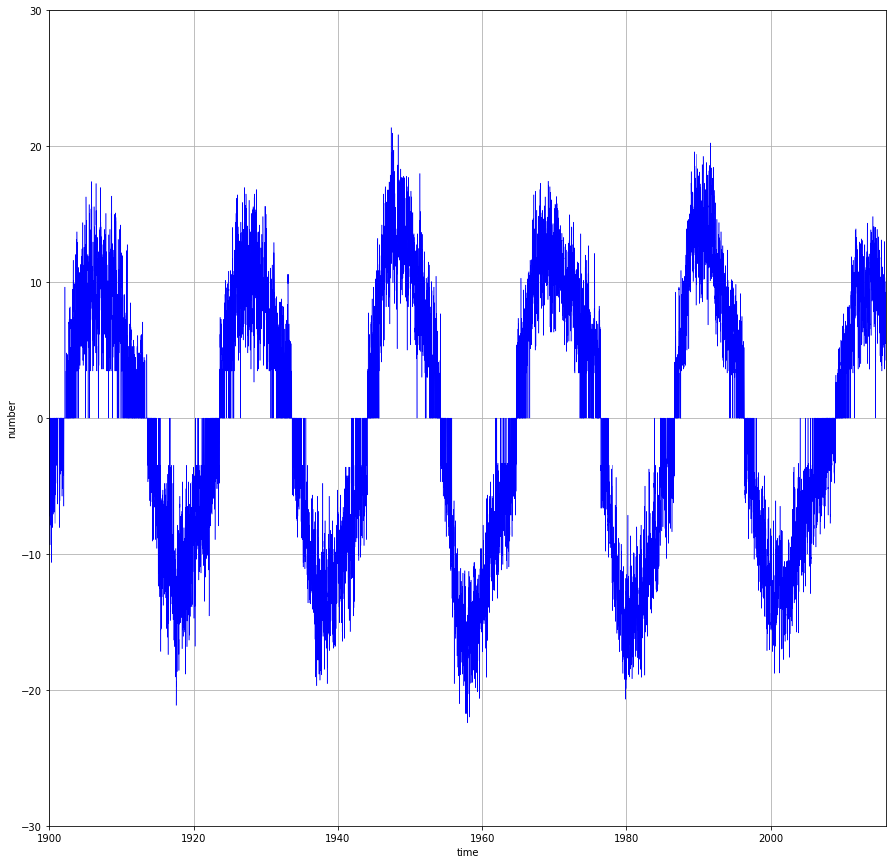

In [31]:
new_data = np.array(get_changed_data(data, activity_minimums_list))
add_graph_parametrs()
plt.plot(new_data[:,0], new_data[:,1], linewidth=0.5, color='b')

In [49]:
def FFT_low_pass(signal, fc, b):
    
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    s = list(signal[:,1])
    new_signal_data = np.convolve(s, sinc_func, mode='same')
    new_signal = []
    dots_num = len(s)
    for i in range(0, dots_num):
        append_data = [signal[i][0], new_signal_data[i]]
        new_signal.append(append_data)
    return new_signal

In [55]:
smoothed_data = np.array(FFT_low_pass(new_data, 0.0001, 0.0021))
print(np.shape(smoothed_data))

(42368, 2)


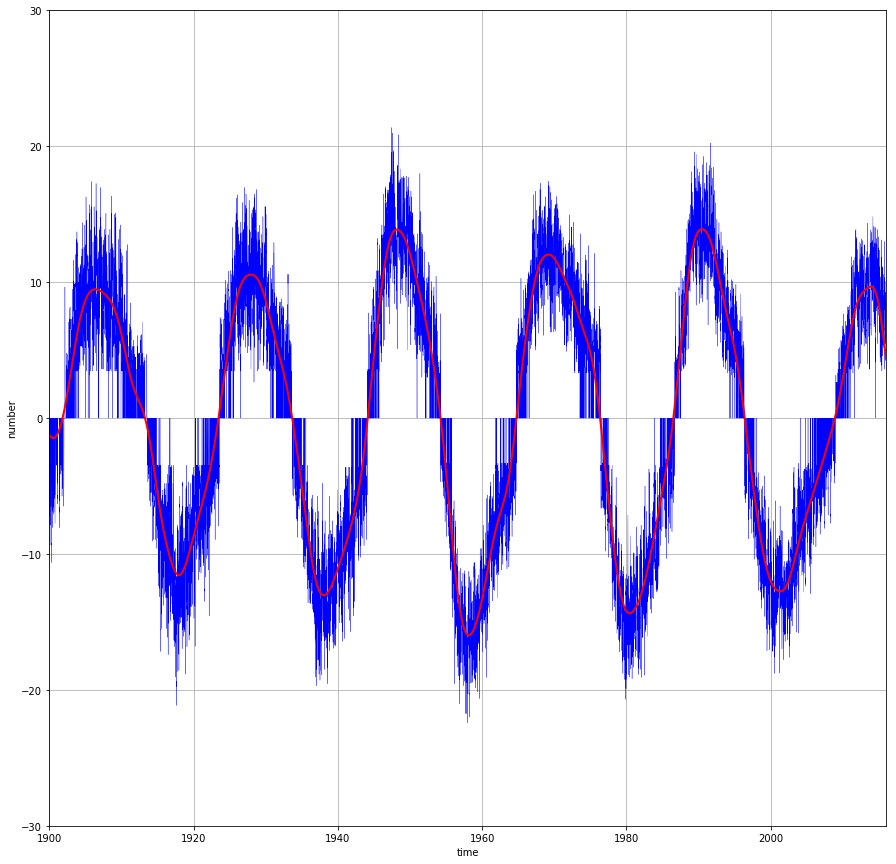

In [58]:
add_graph_parametrs()
plt.plot(new_data[:,0], new_data[:,1], linewidth=0.3, color='b')
plt.plot(smoothed_data[:,0], smoothed_data[:,1], linewidth=2, color='r')

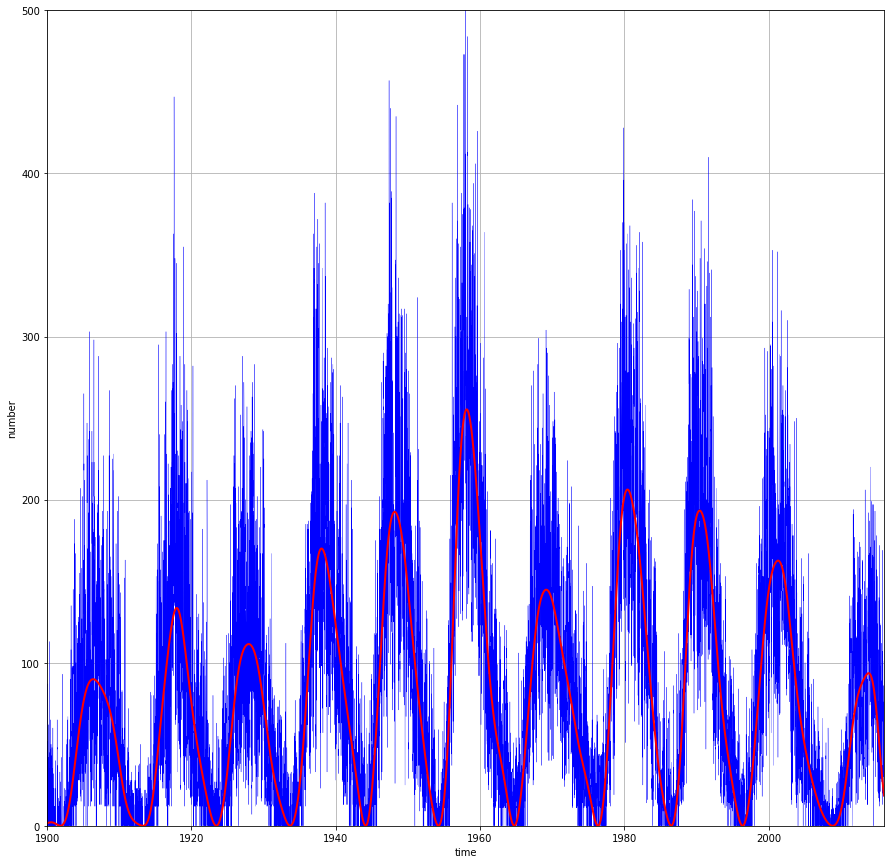

In [61]:
add_graph_parametrs(lower_border=0, upper_border = 500)
plt.plot(new_data[:,0], new_data[:,1] ** 2, linewidth=0.3, color='b')
plt.plot(smoothed_data[:,0], smoothed_data[:,1] ** 2, linewidth=2, color='r')

In [82]:
def find_last_max(data):
    i = np.shape(data)[0] - 1
    while (data[i - 1][1] > data[i][1]):
        i -= 1
    return i

In [83]:
def find_first_zero(data, minimums):
    i = 0
    while (data[i][0] < minimums[0]):
        i += 1
    return i

In [87]:
def get_cicles_borders(data, minimums):
    j = 1
    minimums_num = len(minimums)
    borders = []
    start = find_first_zero(data, minimums)
    finish = find_last_max(data)
    i = start
    while (i <= finish):
        while (i <= finish and (j >= minimums_num or data[i, 0] < minimums[j])):
            i += 1
        cicle_borders = [start, i - 1]
        start = i
        borders.append(cicle_borders)
        j += 1
    return borders

In [105]:
def get_derivative (data, index):
    interval = np.array(data[index - 5: index + 5])
    k = np.polyfit(interval[:,0], interval[:, 1], 1)
    return k[0]

In [101]:
cicles = get_cicles_borders(new_data, activity_minimums_list)

In [102]:
def cicle_phase_portrait (start, finish, data):
    portrait = []
    for i in range(start, finish + 1):
        x = get_derivative(data, i)
        append_pair = [data[i][1], x]
        portrait.append(append_pair)
    return portrait

In [106]:
test = np.array(cicle_phase_portrait(cicles[0][0], cicles[0][1], smoothed_data))

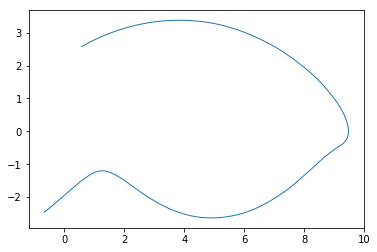

In [107]:
plt.plot(test[:,0], test[:,1], linewidth = 1)

In [108]:
psi = 1
lamda = 1
mu = 1
omega = 1

In [109]:
def VPLD (t, y):
    dydt = [y[1], -lamda * x ** 3 -omega ** 2 * y[0]
           -mu(psi*y[0] ** 2 - 1) * y[1]]
    return dydt

In [110]:
def create_VPLD_solution(start, finish, data):
    sol = solv_ivp(VLPD, (data[start][0], data[finish][0]), method='RK45',
                   t_eval=np.linspace(data[start][0], data[finish][0], finish - start + 1))